# Задача предсказания. Линейная регрессия

Предсказание числового признака называется **задачей регрессии**

Предсказываемый признак называется **целевым**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
# подключить библиотеку с линейной регрессией

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/задания к курсу/students.csv', delimiter=',')
df_cut=df[['Growth','Shoe size']]
df_cut=df_cut.dropna()

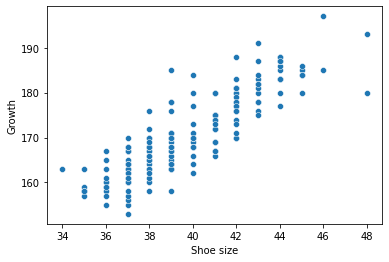

In [ ]:
sns.scatterplot(data=df_cut, x='Shoe size', y='Growth')

Гипотеза: рост линейно зависит от размера обуви.
Growth=a*ShSize+b
коэффициента a,b неизвестны
Модель линейной регрессии умеет находить оптимальные коэффициенты

In [ ]:
lienearRegression = LinearRegression()
results=lienearRegression.fit(df_cut['Shoe size'].values.reshape(-1, 1), y=df_cut['Growth'].values)

In [ ]:
df_cut['Shoe size'].values.reshape(-1,1)

In [ ]:
results.coef_, results.intercept_

(array([2.77717058]), 60.36581125736733)

growth=a*Shsize+b

growth=2.7*Shsize+60


In [ ]:
df_cut['Predicted Growth']=results.predict(df_cut['Shoe size'].values.reshape(-1, 1))

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(df_cut['Growth'], df_cut['Predicted Growth'])

3.450698681998386

In [ ]:
df_cut.head(20)

In [ ]:
df_cut=df[['MIddle and index finger','Middle and ring finger','Middle and little finger']]

In [ ]:
results=lienearRegression.fit(df_cut[['Middle and ring finger','Middle and little finger']].values.reshape(-1, 2), y=df_cut['MIddle and index finger'].values)
results.intercept_,results.coef_

(7.436145518798954, array([0.10731496, 0.04389948]))

MIddle and index finger=0.107 Middle and ring finger+0.04Middle and little finger+7.44


In [ ]:
df_cut['Predicted']=results.predict(df_cut[['Middle and ring finger','Middle and little finger']].values.reshape(-1, 2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
mean_absolute_error(df_cut['Predicted'], df_cut['MIddle and index finger'])

3.094567105647603

# Проверка точности модели на новой выборке

До этого момента мы тренировали модель и проверяли ее качество (mean_absolute_error) на одних и тех же данных. 

Вообще говоря, это читерство, так как модель была построена **с участием данных**, на которых она потом проверяется. 

Поэтому в анализе данных поступают так:

У вас есть **две** таблицы: **тренировочная и тестовая выборка.**

Модель строится по **тренировочной** выборке. Качество ее проверяется по **тестовой** выборке.

Сейчас мы это реализуем. Загружаем второую таблицу со студентами, которая не использовалась ранее:

In [ ]:
df_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/задания к курсу/students_test.csv', delimiter=',')
df_test_cut=df_test[['MIddle and index finger','Middle and ring finger','Middle and little finger']]

Внимание: через функцию predict прогоняем объекты **тестовой** выборки

In [ ]:
df_test_cut['Predicted']=results.predict(df_test_cut[['Middle and ring finger','Middle and little finger']].values.reshape(-1, 2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_test_cut.head()

,MIddle and index finger,Middle and ring finger,Middle and little finger,Predicted
0,3.0,5,12,8.499514
1,9.0,12,50,10.918899
2,7.0,14,40,10.694534
3,5.0,7,10,8.626345
4,10.0,10,35,10.045777


In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(df_test['Growth'], df_test['Predicted Growth'])